# Evaluate the Performance and Accuracy as a Function of Batch Size
Larger batches of molecules per generation task mitigate the the cost of starting a new generation task at the expense of higher latency
We explore the tradeoff between these effects in this notebook.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Configuration

In [2]:
target_system = 'polaris'

## Load Runtime Results
We saved the results of tests with generation settings in `runtime.json`

In [3]:
runtimes = pd.read_json('runtimes.json', lines=True)
print(f'Loaded {len(runtimes)} experiments')

Loaded 42 experiments


Get only the target system and LAMMPS executable

In [4]:
runtimes = runtimes[runtimes.host.str.startswith(target_system)]
print(f'Downselected to {len(runtimes)} experiments')

Downselected to 42 experiments


## Plot Runtime vs Batch Size
We should see faster generation rates at larger sizes

In [5]:
runtimes['rate'] = runtimes['n_samples'] / runtimes['runtime']

In [6]:
avg_by_batch = runtimes.groupby('n_samples')[['runtime', 'rate']].mean()

Text(0, 0.5, 'Rate (mol/s)')

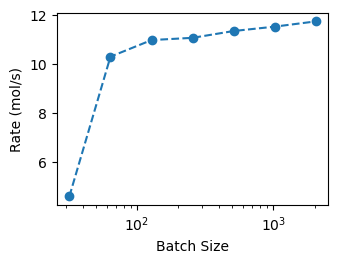

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.semilogx(avg_by_batch.index, avg_by_batch['rate'], '--o')

ax.set_xlabel('Batch Size')
ax.set_ylabel('Rate (mol/s)')

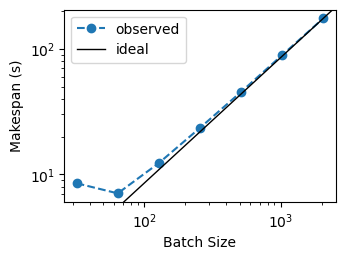

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.loglog(avg_by_batch.index, avg_by_batch['runtime'], '--o', label='observed')

best_rate = avg_by_batch['rate'].max()
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.loglog(ax.get_xlim(), np.divide(ax.get_xlim(), best_rate), 'k-', lw=1, label='ideal')

ax.set_xlabel('Batch Size')
ax.set_ylabel('Makespan (s)')
ax.legend()